# Document de data visualisation sur une base de données NBA

Ce document sert à analyser, et visualiser des données sur les différents joueurs NBA, de la saison 1996/1997 à 2022/2023.

In [4]:
# On importe nos librairies Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# On récupère notre jeu de données
df = pd.read_csv("./all_seasons.csv")

# On effectue certaines modifications, dû à des incohérences dans le jeu de données
df["draft_round"]= df["draft_round"].replace("0", "Undrafted")
df["draft_number"]= df["draft_number"].replace("0", "NULL")
df["draft_number"]= df["draft_number"].replace("Undrafted", "NULL")




# Statistiques générales
On commence avec l'affichage de certaines statistiques générales sur notre jeu de données

In [6]:
# On affiche les cinq premières colonnnes
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [7]:
# On affiche les cinq dernières colonnes
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,...,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


In [8]:
# On affiche toutes nos colonnes
print(df.columns)

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


In [9]:
# On affiche chaque colonne dans l'ordre
column = ['player_name', 'team_abbreviation', 'college', 'country', 'season']

# On affiche les valeurs uniques pour chaque colonne
for col in column:
    print(col, df[col].unique())
    print(" ")

player_name ['Randy Livingston' 'Gaylon Nickerson' 'George Lynch' ...
 'Jeff Dowtin Jr.' 'Jeremy Sochan' 'John Butler Jr.']
 
team_abbreviation ['HOU' 'WAS' 'VAN' 'LAL' 'DEN' 'ORL' 'CHH' 'MIL' 'DET' 'POR' 'DAL' 'UTA'
 'SEA' 'BOS' 'IND' 'SAS' 'MIA' 'ATL' 'NJN' 'LAC' 'GSW' 'PHI' 'NYK' 'TOR'
 'PHX' 'MIN' 'CHI' 'SAC' 'CLE' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BKN' 'NOP']
 
college ['Louisiana State' 'Northwestern Oklahoma' 'North Carolina'
 'Florida State' 'UCLA' 'Tennessee-Chattanooga' nan 'Michigan' 'Purdue'
 'Duke' 'Ohio' 'Eastern Michigan' 'Nevada-Las Vegas' 'Kansas'
 'Texas-El Paso' 'Indiana' 'Louisville' 'Houston' 'Oklahoma'
 'Oral Roberts' 'Oregon State' 'Brigham Young' 'Washington' 'Memphis'
 'Notre Dame' 'Delaware State' 'Alabama' 'Wyoming' 'Pittsburgh'
 'Providence' 'Nebraska' 'Michigan State' 'Mississippi State'
 'New Orleans' 'Penn State' 'Western Carolina' 'Iowa State'
 "St. Mary's (TX)" 'Clemson' 'Ohio State' 'Georgetown' 'Marquette'
 'Virginia Tech' 'Southern Mississippi' 'McNeese

In [10]:
# On affiche le nombre de valeurs uniques pour chaque colonnes
column = ['player_name', 'team_abbreviation', 'college', 'country', 'season']

for col in column:
    print(col, df[col].nunique())
    print(" ")

player_name 2551
 
team_abbreviation 36
 
college 356
 
country 82
 
season 27
 


In [28]:
# On affiche les cinq valeurs les plus présentes de nos colonnes
column = ['player_name', 'country', 'season']

for col in column:
    print(df[col].value_counts().head())
    print(" ")

player_name
Vince Carter      22
Dirk Nowitzki     21
Jamal Crawford    20
Udonis Haslem     20
Kobe Bryant       20
Name: count, dtype: int64
 
country
USA          10721
Canada         205
France         190
Australia      100
Spain           93
Name: count, dtype: int64
 
season
2021-22    605
2017-18    540
2020-21    540
2022-23    539
2018-19    530
Name: count, dtype: int64
 


Pour chaque colonne, voici l'analyse et la conclusion que nous pouvons en tirer :
- Pour la colonne des joueurs, Vince Carter est celui qui a joué le plus de saisons, son nom apparaissant le plus de fois dans la liste

- Les Etats-Unis sont bien entendu le pays majoritaire de la NBA, talonnés de près par les autres grandes nations du basket-ball.

- Enfin, les dernières saisons sont celles qui contiennent le plus de joueurs.

On affiche cela sous forme de graphique.

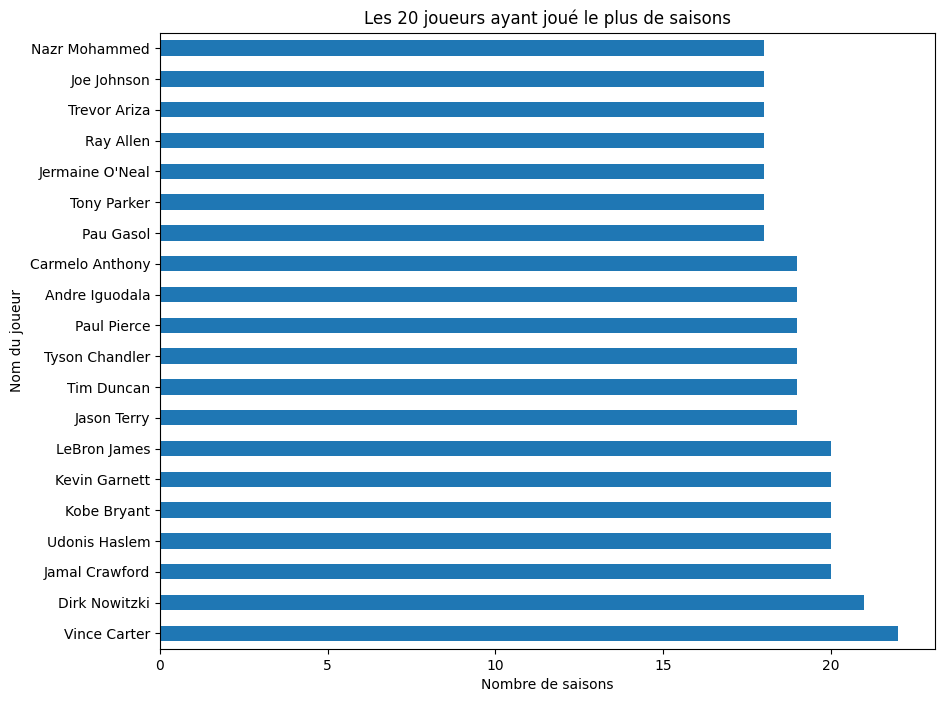

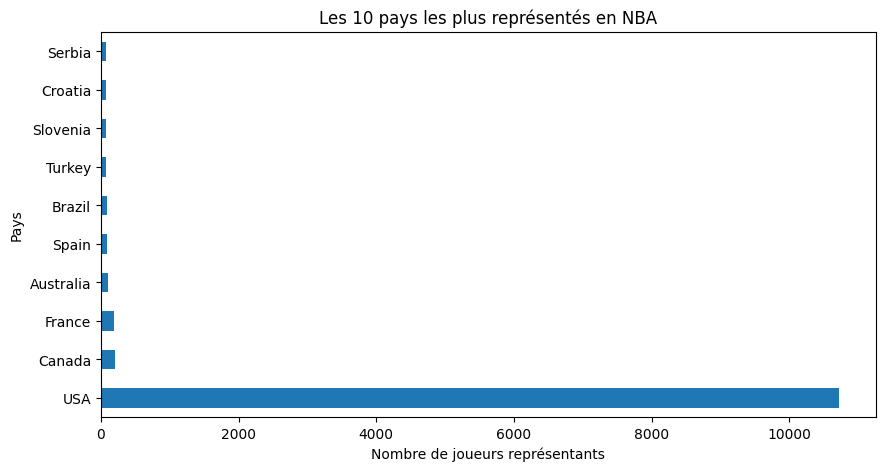

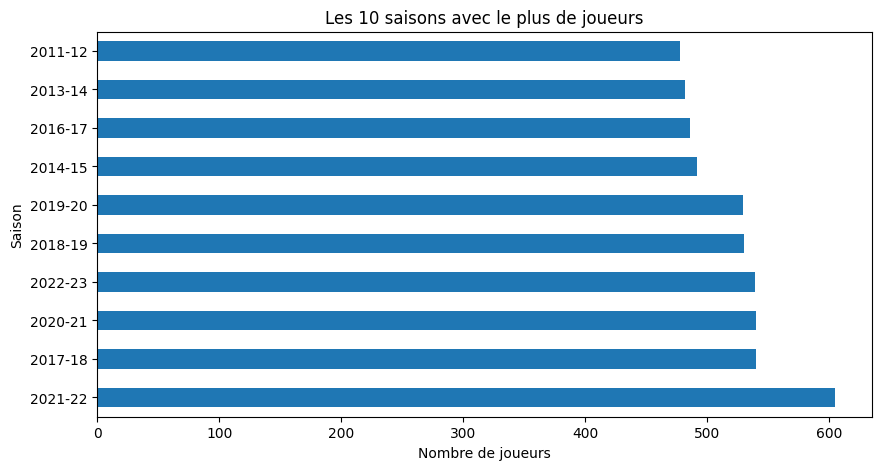

In [12]:
plt.figure(figsize=(10, 8))
df['player_name'].value_counts().head(20).plot(kind="barh")
plt.title("Les 20 joueurs ayant joué le plus de saisons")
plt.ylabel("Nom du joueur")
plt.xlabel("Nombre de saisons")
plt.show()

plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind="barh")
plt.title("Les 10 pays les plus représentés en NBA")
plt.ylabel("Pays")
plt.xlabel("Nombre de joueurs représentants")
plt.show()

plt.figure(figsize=(10, 5))
df['season'].value_counts().head(10).plot(kind="barh")
plt.title("Les 10 saisons avec le plus de joueurs")
plt.ylabel("Saison")
plt.xlabel("Nombre de joueurs")
plt.show()



In [13]:
# Statistiques de notre jeu de données pour les 3 statistiques principales de la NBA : points, rebonds, passes décisives
col = ['pts', 'reb', 'ast']
df[col].describe()

,pts,reb,ast
count,12844.000000,12844.000000,12844.000000
mean,8.212582,3.558486,1.824681
std,6.016573,2.477885,1.800840
min,0.000000,0.000000,0.000000
25%,3.600000,1.800000,0.600000
50%,6.700000,3.000000,1.200000
75%,11.500000,4.700000,2.400000
max,36.100000,16.300000,11.700000


Ici, nous avons les statistiques générales de nos joueurs, on peut notamment observer le nombre maximum, minimum et la moyenne de chacune de nos statistiques pour chaque joueur de la NBA.

Text(0.5, 0, 'Taille moyenne (cm)')

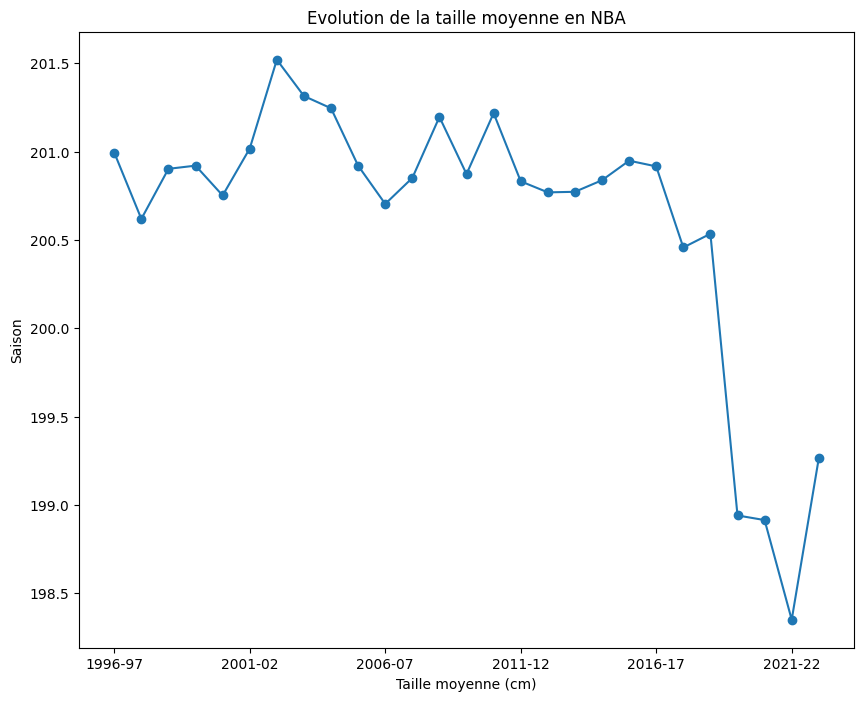

In [55]:
# Evolution de la taille moyenne en NBA
plt.figure(figsize=(10, 8))
df.groupby("season")["player_height"].mean().plot(kind="line", marker="o")
plt.title("Evolution de la taille moyenne en NBA")
plt.ylabel("Saison")
plt.xlabel("Taille moyenne (cm)")

On remarque que la taille moyenne n'a pas évolué en 25 ans, et régresse légèrement ces dernières saisons.

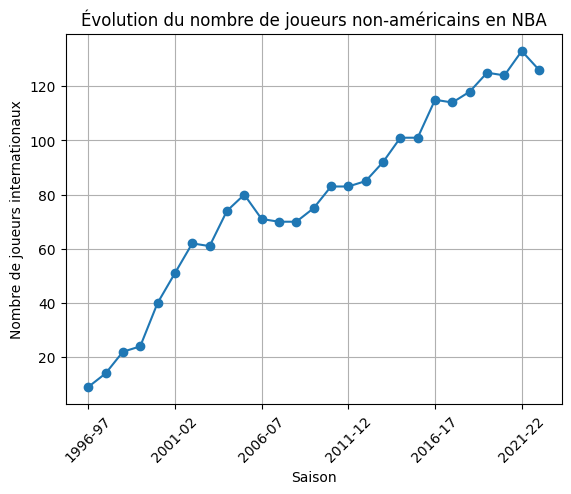

In [52]:
# Evolution du nombre de non américains dans la ligue
df["international"] = df["country"] != "USA"
international_counts = df[df['international']].groupby('season')['player_name'].nunique()
international_counts.plot(kind='line', marker='o')
plt.title("Évolution du nombre de joueurs non-américains en NBA")
plt.xlabel("Saison")
plt.ylabel("Nombre de joueurs internationaux")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Performances sportives
Dans cette partie nous allons jeter un coup d'oeil aux plus grosses performances sportives réalisées en NBA.

In [15]:
col = ["player_name", "team_abbreviation", "pts", "season"]
print("Les 10 meilleurs scoreurs de 1996 à 2023 sur une seule saison")
df[df["gp"]>50][col].nlargest(10, "pts")


Les 10 meilleurs scoreurs de 1996 à 2023 sur une seule saison


,player_name,team_abbreviation,pts,season
10227,James Harden,HOU,36.1,2018-19
4163,Kobe Bryant,LAL,35.4,2005-06
10634,James Harden,HOU,34.3,2019-20
12839,Joel Embiid,PHI,33.1,2022-23
4302,Allen Iverson,PHI,33.0,2005-06
12740,Luka Doncic,DAL,32.4,2022-23
12564,Damian Lillard,POR,32.2,2022-23
2847,Tracy McGrady,ORL,32.1,2002-03
8013,Kevin Durant,OKC,32.0,2013-14
11537,Stephen Curry,GSW,32.0,2020-21


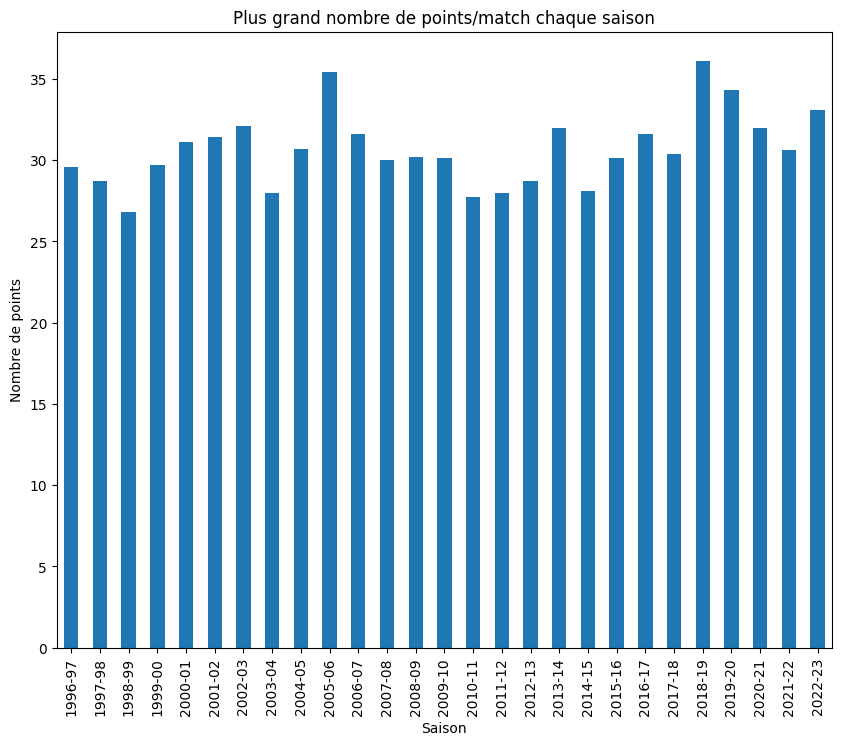

In [29]:
df.groupby("season")["pts"].max().plot(kind="bar", figsize=(10, 8))
plt.title("Plus grand nombre de points/match chaque saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de points")
plt.show()


In [17]:
col = ["player_name", "team_abbreviation", "reb", "season"]
print("Les 10 meilleurs rebondeurs de 1996 à 2023 sur une seule saison (minimum 50 matchs joués)")
df[df["gp"]>50][col].nlargest(10, "reb")

Les 10 meilleurs rebondeurs de 1996 à 2023 sur une seule saison (minimum 50 matchs joués)


,player_name,team_abbreviation,reb,season
188,Dennis Rodman,CHI,16.1,1996-97
9907,Andre Drummond,DET,16.0,2017-18
10286,Andre Drummond,DET,15.6,2018-19
2948,Ben Wallace,DET,15.4,2002-03
6292,Kevin Love,MIN,15.2,2010-11
9885,DeAndre Jordan,LAC,15.2,2017-18
10855,Andre Drummond,CLE,15.2,2019-20
760,Dennis Rodman,CHI,15.0,1997-98
8446,DeAndre Jordan,LAC,15.0,2014-15
8767,Andre Drummond,DET,14.8,2015-16


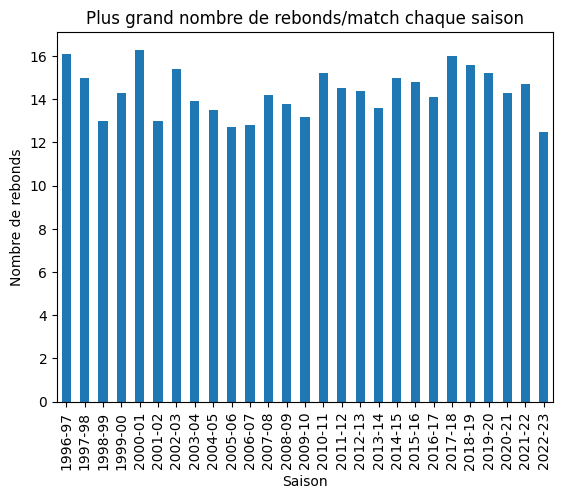

In [18]:
df.groupby("season")["reb"].max().plot(kind="bar")
plt.title("Plus grand nombre de rebonds/match chaque saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de rebonds")
plt.show()


In [19]:
col = ["player_name", "team_abbreviation", "ast", "season"]
print("Les 10 meilleurs passeurs de 1996 à 2023 sur une seule saison (minimum 50 matchs joués)")
df[df["gp"]>50][col].nlargest(10, "ast")

Les 10 meilleurs passeurs de 1996 à 2023 sur une seule saison (minimum 50 matchs joués)


,player_name,team_abbreviation,ast,season
7062,Rajon Rondo,BOS,11.7,2011-12
8882,Rajon Rondo,SAC,11.7,2015-16
11555,Russell Westbrook,WAS,11.7,2020-21
4697,Steve Nash,PHX,11.6,2006-07
5060,Chris Paul,NOH,11.6,2007-08
3647,Steve Nash,PHX,11.5,2004-05
342,Mark Jackson,IND,11.4,1996-97
6445,Steve Nash,PHX,11.4,2010-11
6609,Rajon Rondo,BOS,11.2,2010-11
9457,James Harden,HOU,11.2,2016-17


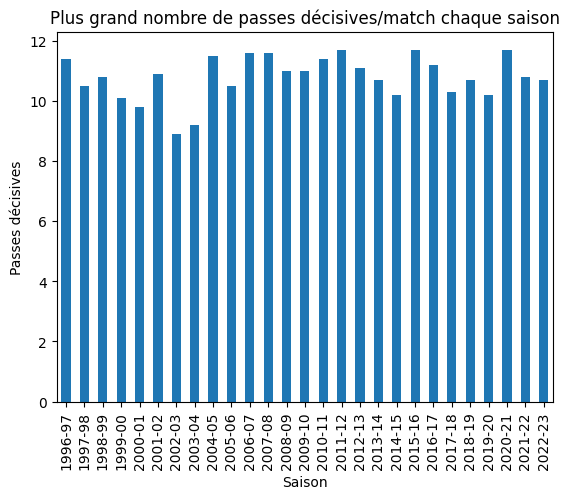

In [20]:
df.groupby("season")["ast"].max().plot(kind="bar")
plt.title("Plus grand nombre de passes décisives/match chaque saison")
plt.xlabel("Saison")
plt.ylabel("Passes décisives")
plt.show()

In [26]:
# On effectue une corrélation entre la taille et la moyenne des rebonds pris par match.
rapport_taille_rebonds = pd.DataFrame({
    'Moyenne de rebonds': df['reb'],
    'Taille de joueur': df['player_height']
})

rapport_taille_rebonds.corr()

,Moyenne de rebonds,Taille de joueur
Moyenne de rebonds,1.00000,0.42422
Taille de joueur,0.42422,1.00000


# Parcours et formation
On analyse les performances selon le parcours ou la formation des joueurs NBA.

In [22]:
# On affiche les universités les plus représentées
df["college"].value_counts()

college
Kentucky             447
Duke                 410
North Carolina       355
UCLA                 318
Arizona              293
                    ... 
Arizona St.            1
Stephen F. Austin      1
San Francisco          1
John A. Logan          1
Buffalo                1
Name: count, Length: 356, dtype: int64

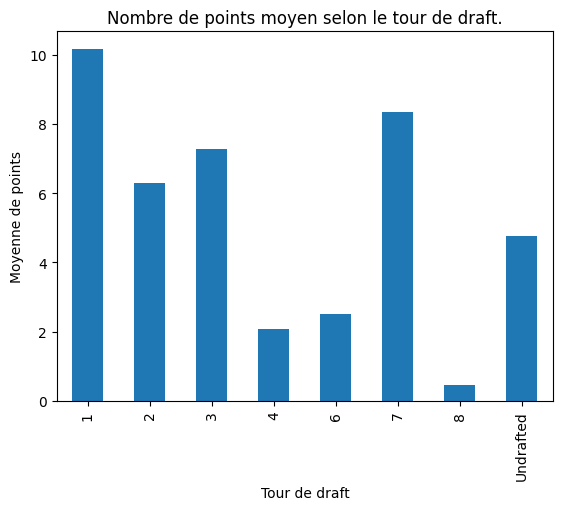

In [23]:
df.groupby("draft_round")["pts"].mean().plot(kind="bar")
plt.title("Nombre de points moyen selon le tour de draft.")
plt.xlabel("Tour de draft")
plt.ylabel("Moyenne de points")
plt.show()

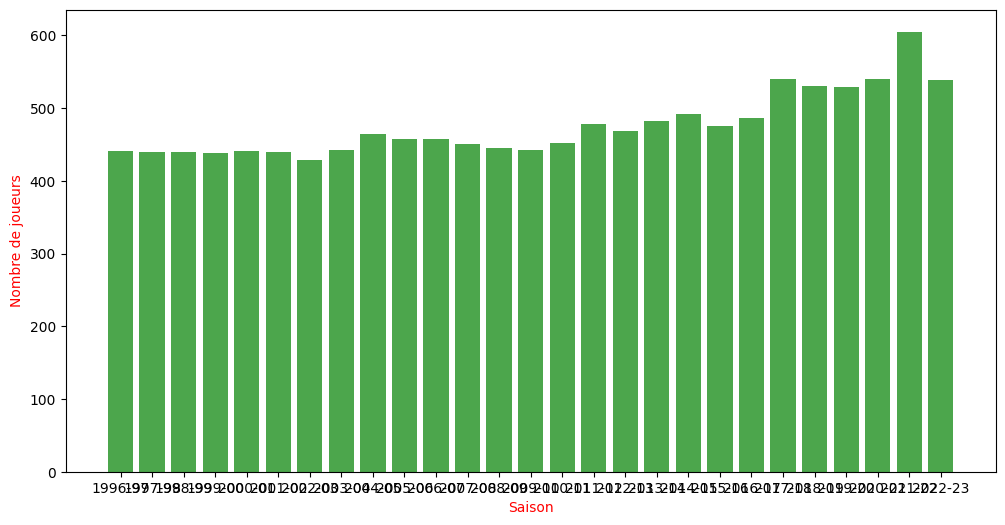

In [24]:
# Création d'un DataFrame avec les deux métriques
stats_par_saison = pd.DataFrame({
    'Nombre de joueurs': df.groupby('season')['player_name'].count(),
    'Nombre d\'équipes': df.groupby('season')['team_abbreviation'].nunique()
}).sort_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe pour le nombre de joueurs (barres)
ax1.bar(stats_par_saison.index, stats_par_saison['Nombre de joueurs'], color='green', alpha=0.7)
ax1.set_xlabel('Saison', color='red')
ax1.set_ylabel('Nombre de joueurs', color='red')
plt.show()

On analyse ici l'évolution du nombre de joueurs dans la ligue et on remarque qu'au final des années le nombre de joueurs a constammé évolué, atteignant un pic durant la fin des années 2010.